In [ ]:
#split_into_three_age_group.   23.01.13

#Purpose: 23.01.11, Jae suggested to find some differentially abundant features (and different pattern) across the three stratified age group.
#[1] First, investigate the age distribution of ACPA–, ACPA+, control



In [1]:
def make_age_index(data_file):
    data_df = pd.read_csv(data_file, sep="\t", index_col=0)
    r, c = data_df.shape

    patient_id_list = data_df.columns.values
    feature_list = data_df.index.values

    control_age_dict = {}
    acpa_neg_age_dict = {}
    acpa_pos_age_dict = {}

    for j in range(c):
        patient_ID = patient_id_list[j]
        acpa = data_df.iloc[0][j]
        age = data_df.iloc[2][j]
        
        if acpa == 0:
            control_age_dict[patient_ID] = age                        
        if acpa == 1:
            acpa_neg_age_dict[patient_ID] = age
        if acpa == 2:
            acpa_pos_age_dict[patient_ID] = age
        
    control_age_dict = dict(sorted(control_age_dict.items(), key=lambda item:item[1]))
    acpa_neg_age_dict = dict(sorted(acpa_neg_age_dict.items(), key=lambda item:item[1]))
    acpa_pos_age_dict = dict(sorted(acpa_pos_age_dict.items(), key=lambda item:item[1]))
    
    return control_age_dict, acpa_neg_age_dict, acpa_pos_age_dict

def draw_distplot(control_age_dict, acpa_neg_age_dict, acpa_pos_age_dict):
    
    temp_value_list = []
    temp_class_list = []
    
    for key in list(control_age_dict.keys()):
        temp_value_list.append(control_age_dict[key])
        temp_class_list.append("0")
    
    for key in list(acpa_neg_age_dict.keys()):
        temp_value_list.append(acpa_neg_age_dict[key])
        temp_class_list.append("2")
    
    for key in list(acpa_pos_age_dict.keys()):
        temp_value_list.append(acpa_pos_age_dict[key])
        temp_class_list.append("1")

    temp_dict = {'age': temp_value_list, 'class': temp_class_list}
    temp_df = pd.DataFrame.from_dict(temp_dict)
    
    output_pdf = '../../preprocessed_data/age_stratified/dist_plot.pdf'
    displot = sns.displot(temp_df, x = "age", hue="class")
    displot.savefig(output_pdf)

    
def get_data_dict(data_file):
    data_df = pd.read_csv(data_file, sep="\t", index_col=0)
    r, c = data_df.shape

    patient_id_list = data_df.columns.values
    feature_list = data_df.index.values

    patient_class_dict = {}
    data_dict = {}

    for i in range(r):

        feature = feature_list[i]
        for j in range(c):
            patient_ID = patient_id_list[j]
            value = data_df.iloc[i][j]
            data_dict[feature, patient_ID] = value
        
    return data_dict, feature_list

def make_age_stratified_list(control_age_dict, acpa_neg_age_dict, acpa_pos_age_dict):
      
    low_age_patient_list = []
    high_age_patient_list = []
        
    for patient_ID in list(control_age_dict.keys()):
        age = control_age_dict[patient_ID]
        if age <= 60:
            low_age_patient_list.append(patient_ID)
        else:
            high_age_patient_list.append(patient_ID)
            

    for patient_ID in list(acpa_neg_age_dict.keys()):
        age = acpa_neg_age_dict[patient_ID]
        if age <= 60:
            low_age_patient_list.append(patient_ID)
        else:
            high_age_patient_list.append(patient_ID)

    for patient_ID in list(acpa_pos_age_dict.keys()):
        age = acpa_pos_age_dict[patient_ID]
        if age <= 60:
            low_age_patient_list.append(patient_ID)
        else:
            high_age_patient_list.append(patient_ID)

    
    return low_age_patient_list, high_age_patient_list

def make_age_stratified_output(data_dict, feature_list, age_patient_list, age_output):
    
    output_txt = open(age_output,'w')
    
    #header
    for patient_ID in age_patient_list:
        output_txt.write('\t%s' % patient_ID)
    output_txt.write('\n')
    
    for feature in feature_list:
        output_txt.write(feature)
        
        for patient_ID in age_patient_list:
            value = data_dict[feature, patient_ID]
            output_txt.write('\t%s' % value)
        output_txt.write('\n')
            
    output_txt.close()



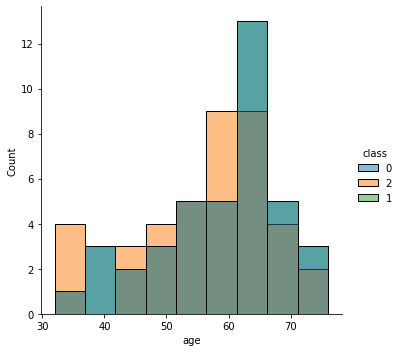

In [2]:
if __name__ == "__main__":
    
    import sys
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    
    data_file = "../../preprocessed_data/3_omics/three_omics_multiplex.tsv"
    
    control_age_dict, acpa_neg_age_dict, acpa_pos_age_dict= make_age_index(data_file)
    draw_distplot(control_age_dict, acpa_neg_age_dict, acpa_pos_age_dict)
    
    data_dict, feature_list = get_data_dict(data_file)
    
    low_age_patient_list, high_age_patient_list = make_age_stratified_list(control_age_dict, acpa_neg_age_dict, acpa_pos_age_dict)
    make_age_stratified_output(data_dict, feature_list, low_age_patient_list, '../../preprocessed_data/age_stratified/60_under_age_3_omics.tsv')
    make_age_stratified_output(data_dict, feature_list, high_age_patient_list, '../../preprocessed_data/age_stratified/60_over_age_3_omics.tsv')
    